In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files
import numpy as np
import seaborn as sns
from collections import Counter
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
sns.set(style = "darkgrid")
from matplotlib.pyplot import figure
%matplotlib inline

In [ ]:
url = 'https://raw.githubusercontent.com/adamnd1190/data-mining-project/main/players_22.csv'
df1 = pd.read_csv(url) # Load Excel sheet from the given Github url
df1.head(3)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (25,108) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,...,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,NaN,2021-08-10,2023.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Playmaker ...",85.0,92.0,91.0,...,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,NaN,2014-07-01,2023.0,37,Poland,1353.0,RS,9.0,Right,4,4,5,High/Medium,Unique,Yes,197200000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Solid Player, Finesse Shot, Outside Foot Shot,...",78.0,92.0,79.0,...,42,19,15,6,12,8,10,NaN,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,1985-02-05,187,83,11.0,Manchester United,English Premier League,1.0,ST,7.0,NaN,2021-08-27,2023.0,38,Portugal,1354.0,ST,7.0,Right,4,5,5,High/Low,Unique,Yes,83300000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...","Power Free-Kick, Flair, Long Shot Taker (AI), ...",87.0,94.0,80.0,...,32,24,7,11,15,14,11,NaN,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png


Text(0, 0.5, 'Age')

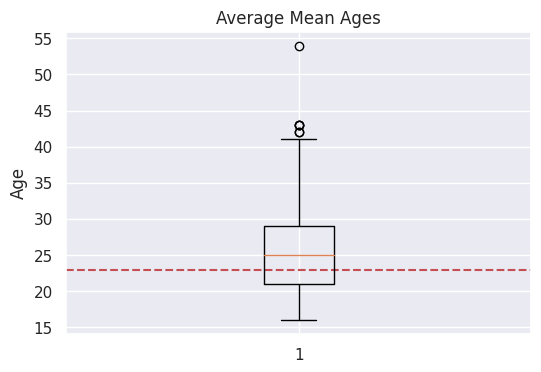

In [ ]:
fig1, ax1 = plt.subplots(dpi=100)
test = df1['age'].tolist()
plt.axhline(test[94], c='r', linestyle='--')
ax1.set_title('Average Mean Ages')
ax1.boxplot(test)
ax1.set_ylabel('Age')

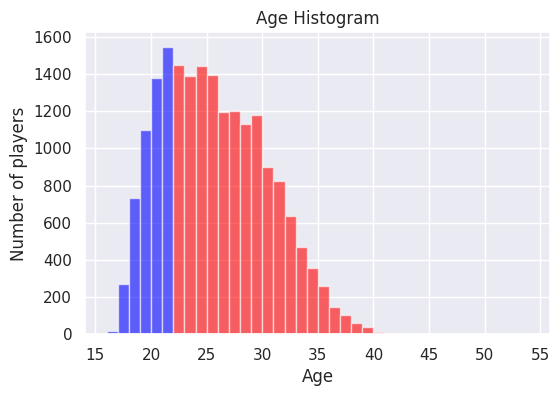

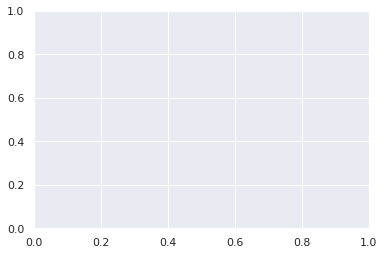

In [ ]:
fig2, ax2 = plt.subplots(dpi=100)
ax2.set_title('Age Histogram')
n, bins, patches = ax2.hist(df1['age'], bins=38, facecolor='r', alpha=0.6, edgecolor="white")
ax2.set_xlabel('Age')
ax2.set_ylabel('Number of players')

for i in range(0,6):
    patches[i].set_facecolor('blue')
for i in range(6, len(patches)):
    patches[i].set_facecolor('red')
fig, ax = plt.subplots()


#N, bins, patches = ax2.hist(df1['age'], edgecolor='white', linewidth=1)



plt.show()

In [ ]:
df1['player_position'] = df1['player_positions'].str.split(", ", 3)
df1['player_position'] = [l[0] for l in df1['player_position']]
df1['player_position'].head()

0    RW
1    ST
2    ST
3    LW
4    CM
Name: player_position, dtype: object

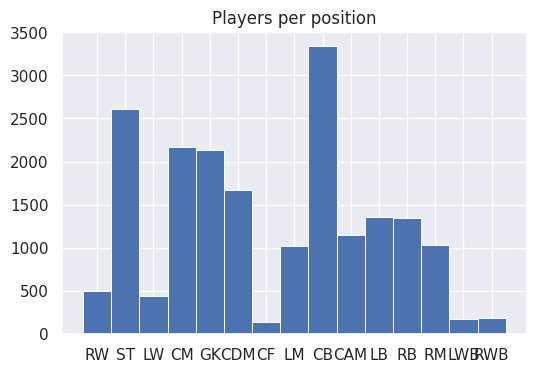

In [ ]:
barp1, axbarp1 = plt.subplots(dpi=100)
tot = Counter(df1['player_position'].tolist())
axbarp1.set_title('Players per position')
axbarp1.bar(list(tot.keys()), list(tot.values()) , width=1, edgecolor="white", linewidth=0.7, bottom=None)
plt.show()

In [ ]:
##fig3, ax3 = plt.subplots(dpi=100)
##ax3.set_title('Position Histogram')
##n, bins, patches = ax3.hist(df1['player_position'], bins=10, density=False, facecolor='r', alpha=0.5, edgecolor="white")
##ax3.set_xlabel(r'age')
##plt.xticks(rotation=90)

Text(0, 0.5, 'Overall')

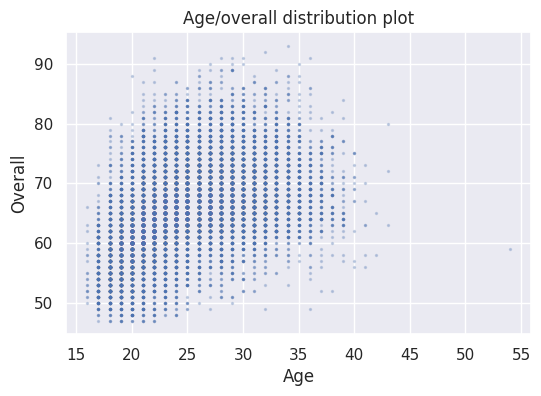

In [ ]:
fig4, ax4 = plt.subplots(dpi=100)
ax4.set_title('Age/overall distribution plot')
ax4.scatter(df1['age'],df1['overall'],s=8, marker='.', alpha=0.25)
ax4.set_xlabel('Age')
ax4.set_ylabel('Overall')

In [ ]:
data = {'a' : df1['age'], 'b' : df1['overall']}
ages1 = np.ma.masked_where(df1['age'] < 23, df1['age'])
print(ages1)

[34 32 36 ... -- -- --]


Text(0, 0.5, 'player_position')

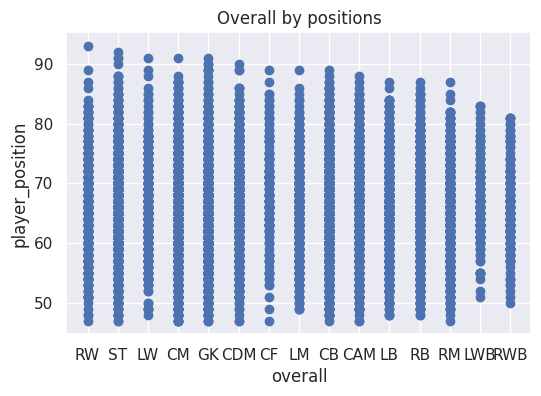

In [ ]:
fig5, ax5 = plt.subplots(dpi=100)
ax5.set_title('Overall by positions')
ax5.scatter(df1['player_position'], df1['overall'])
ax5.set_xlabel('overall')
ax5.set_ylabel('player_position')

In [ ]:
df1.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))


,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,club_jersey_number,club_contract_valid_until,nationality_id,nation_team_id,nation_jersey_number,weak_foot,skill_moves,international_reputation,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,19239.000000,19239.000000,19239.000000,19165.000000,19178.000000,19239.000000,19239.000000,19239.000000,19178.000000,19178.000000,19178.000000,19178.000000,19239.000000,759.000000,759.000000,19239.000000,19239.000000,19239.000000,18063.000000,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,2132.000000
mean,231468.086959,65.772182,71.079370,2850451.813201,9017.989363,25.210822,181.299704,74.943032,50580.498123,1.354364,20.945250,2022.764000,58.602682,14480.848485,12.567852,2.946151,2.352461,1.094184,5374044.123346,68.213071,52.345297,57.312562,62.561174,51.703630,64.823289,49.577421,45.894433,51.783877,58.867977,42.463849,55.660429,47.268933,42.249025,53.072249,58.472010,64.652893,64.714902,63.500078,61.450023,64.068611,57.776860,64.813504,63.084880,65.007745,46.642705,55.538957,46.613545,50.330215,53.964603,47.858724,57.929830,46.601746,48.045584,45.906700,16.406102,16.192474,16.055356,16.229274,16.491814,36.439962
std,27039.717497,6.880232,6.086213,7613699.947459,19470.176724,4.748235,6.863179,7.069434,54401.868535,0.747865,17.909369,1.213203,50.298614,35328.730217,7.039116,0.671560,0.767659,0.371098,14948367.962501,10.933155,14.051623,10.068965,9.651312,16.189746,9.791886,18.034661,19.721023,17.294183,14.490858,17.653329,18.784590,18.181085,17.178590,15.026569,16.663722,15.167399,14.965426,14.862285,9.042281,14.324789,13.192224,12.122977,16.145279,12.663518,19.411583,16.972181,20.677077,19.621601,13.650481,15.768583,12.159326,20.200807,21.232718,20.755683,17.574028,16.839528,16.564554,17.059779,17.884833,10.751563
min,41.000000,47.000000,49.000000,9000.000000,500.000000,16.000000,155.000000,49.000000,1.000000,1.000000,1.000000,2021.000000,1.000000,1318.000000,1.000000,1.000000,1.000000,1.000000,16000.000000,28.000000,18.000000,25.000000,27.000000,14.000000,29.000000,6.000000,2.000000,5.000000,7.000000,3.000000,4.000000,6.000000,4.000000,9.000000,8.000000,14.000000,15.000000,18.000000,25.000000,15.000000,20.000000,22.000000,12.000000,19.000000,4.000000,10.000000,3.000000,2.000000,10.000000,7.000000,12.000000,4.000000,5.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,15.000000
25%,214413.500000,61.000000,67.000000,475000.000000,1000.000000,21.000000,176.000000,70.000000,479.000000,1.000000,9.000000,2022.000000,21.000000,1338.000000,7.000000,3.000000,2.000000,1.000000,806000.000000,62.000000,42.000000,51.000000,57.000000,37.000000,59.000000,38.000000,30.000000,44.000000,54.000000,30.000000,50.000000,35.000000,31.000000,44.000000,55.000000,57.000000,58.000000,55.000

In [ ]:
fc = ['short_name', 'player_position', 'age', 'pace','shooting','passing','dribbling','defending','physic','goalkeeping_diving','goalkeeping_handling','goalkeeping_kicking','goalkeeping_positioning','goalkeeping_reflexes','goalkeeping_speed']


In [ ]:
df1 = df1.drop(df1[df1.age > 23].index)
df1[fc]

,short_name,player_position,age,pace,shooting,passing,dribbling,defending,physic,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
6,K. Mbappé,ST,22,97.0,88.0,80.0,92.0,36.0,77.0,13,5,7,11,6,NaN
21,G. Donnarumma,GK,22,NaN,NaN,NaN,NaN,NaN,NaN,91,83,79,85,90,52.0
29,E. Haaland,ST,20,89.0,91.0,65.0,80.0,45.0,88.0,7,14,13,11,7,NaN
44,T. Alexander-Arnold,RB,22,79.0,68.0,88.0,80.0,80.0,72.0,14,15,14,6,7,NaN
45,J. Sancho,RM,21,81.0,76.0,82.0,91.0,36.0,65.0,7,11,10,11,13,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,Song Defu,CDM,22,58.0,35.0,46.0,48.0,42.0,49.0,6,10,5,15,13,NaN
19235,C. Porter,CM,19,59.0,39.0,50.0,46.0,41.0,51.0,11,12,6,8,10,NaN
19236,N. Logue,CM,21,60.0,37.0,45.0,49.0,41.0,52.0,8,6,7,10,6,NaN
19237,L. Rudden,ST,19,68.0,46.0,36.0,48.0,15.0,42.0,7,10,7,14,15,NaN


In [ ]:
df1.fillna('0', inplace=True)
##df1.replace(np.NaN, 0)
df1[fc]

,short_name,player_position,age,pace,shooting,passing,dribbling,defending,physic,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
6,K. Mbappé,ST,22,97,88,80,92,36,77,13,5,7,11,6,0
21,G. Donnarumma,GK,22,0,0,0,0,0,0,91,83,79,85,90,52
29,E. Haaland,ST,20,89,91,65,80,45,88,7,14,13,11,7,0
44,T. Alexander-Arnold,RB,22,79,68,88,80,80,72,14,15,14,6,7,0
45,J. Sancho,RM,21,81,76,82,91,36,65,7,11,10,11,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,Song Defu,CDM,22,58,35,46,48,42,49,6,10,5,15,13,0
19235,C. Porter,CM,19,59,39,50,46,41,51,11,12,6,8,10,0
19236,N. Logue,CM,21,60,37,45,49,41,52,8,6,7,10,6,0
19237,L. Rudden,ST,19,68,46,36,48,15,42,7,10,7,14,15,0


In [ ]:
df1['player_position'] = df1['player_position'].replace(['RM','RF'],['RW','RW'])
df1['player_position'] = df1['player_position'].replace(['LM','LF'],['LW','LW'])
df1['player_position'] = df1['player_position'].replace(['CF'],['ST'])
df1['player_position'] = df1['player_position'].replace(['CDM','CAM'],['CM','CM'])
df1['player_position'] = df1['player_position'].replace(['LWB','RWB'],['LB','RB'])
df1[fc]

,short_name,player_position,age,pace,shooting,passing,dribbling,defending,physic,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
6,K. Mbappé,ST,22,97,88,80,92,36,77,13,5,7,11,6,0
21,G. Donnarumma,GK,22,0,0,0,0,0,0,91,83,79,85,90,52
29,E. Haaland,ST,20,89,91,65,80,45,88,7,14,13,11,7,0
44,T. Alexander-Arnold,RB,22,79,68,88,80,80,72,14,15,14,6,7,0
45,J. Sancho,RW,21,81,76,82,91,36,65,7,11,10,11,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,Song Defu,CM,22,58,35,46,48,42,49,6,10,5,15,13,0
19235,C. Porter,CM,19,59,39,50,46,41,51,11,12,6,8,10,0
19236,N. Logue,CM,21,60,37,45,49,41,52,8,6,7,10,6,0
19237,L. Rudden,ST,19,68,46,36,48,15,42,7,10,7,14,15,0


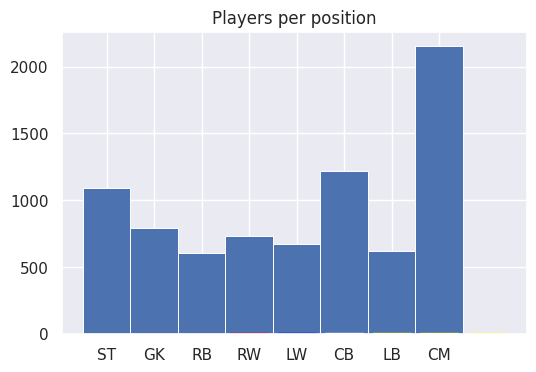

In [ ]:
barp3, axbarp3 = plt.subplots(dpi=100)
tot = Counter(df1['player_position'].tolist())
axbarp3.set_title('Players per position')
axbarp3.bar(list(tot.keys()), list(tot.values()) , width=1, edgecolor="white", linewidth=0.7, bottom=None)
barlist=plt.bar([1,2,3,4,5,6,7,8], [1,2,3,4,5,6,7,8])
barlist[0].set_color('red')
barlist[1].set_color('red')
barlist[2].set_color('red')
barlist[3].set_color('blue')
barlist[4].set_color('white')
barlist[5].set_color('yellow')
barlist[6].set_color('yellow')
barlist[7].set_color('yellow')
plt.show()

In [ ]:
cols = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']
df1['pace'] = pd.to_numeric(df1['pace'], downcast="float")
df1['shooting'] = pd.to_numeric(df1['shooting'], downcast="float")
df1['passing'] = pd.to_numeric(df1['passing'], downcast="float")
df1['dribbling'] = pd.to_numeric(df1['dribbling'], downcast="float")
df1['defending'] = pd.to_numeric(df1['defending'], downcast="float")
df1['physic'] = pd.to_numeric(df1['physic'], downcast="float")

gkcols = ['goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed']
df1['goalkeeping_diving'] = pd.to_numeric(df1['goalkeeping_diving'], downcast="float")
df1['goalkeeping_handling'] = pd.to_numeric(df1['goalkeeping_handling'], downcast="float")
df1['goalkeeping_kicking'] = pd.to_numeric(df1['goalkeeping_kicking'], downcast="float")
df1['goalkeeping_positioning'] = pd.to_numeric(df1['goalkeeping_positioning'], downcast="float")
df1['goalkeeping_reflexes'] = pd.to_numeric(df1['goalkeeping_reflexes'], downcast="float")
df1['goalkeeping_speed'] = pd.to_numeric(df1['goalkeeping_speed'], downcast="float")
cols_eda = ['short_name','overall','potential', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']
df1[cols_eda]

,short_name,overall,potential,pace,shooting,passing,dribbling,defending,physic
6,K. Mbappé,91,95,97.0,88.0,80.0,92.0,36.0,77.0
21,G. Donnarumma,89,93,0.0,0.0,0.0,0.0,0.0,0.0
29,E. Haaland,88,93,89.0,91.0,65.0,80.0,45.0,88.0
44,T. Alexander-Arnold,87,92,79.0,68.0,88.0,80.0,80.0,72.0
45,J. Sancho,87,91,81.0,76.0,82.0,91.0,36.0,65.0
...,...,...,...,...,...,...,...,...,...
19234,Song Defu,47,52,58.0,35.0,46.0,48.0,42.0,49.0
19235,C. Porter,47,59,59.0,39.0,50.0,46.0,41.0,51.0
19236,N. Logue,47,55,60.0,37.0,45.0,49.0,41.0,52.0
19237,L. Rudden,47,60,68.0,46.0,36.0,48.0,15.0,42.0


In [ ]:
## ST
weight = [0.2, 0.3, 0.15, 0.15, 0.05, 0.15]
dfst = df1
dfst = dfst.drop(dfst[dfst.player_position != 'ST'].index)
dfst['new_overall'] = np.average(dfst[cols], weights=weight, axis=1).round(1)
sto = ['short_name', 'player_position','age','overall','new_overall']
dfst[sto].nlargest(1, 'new_overall')

,short_name,player_position,age,overall,new_overall
6,K. Mbappé,ST,22,91,84.9


In [ ]:
## STFIFA
dfstfifa = df1
dfstfifa = dfstfifa.drop(dfstfifa[dfstfifa.player_position != 'ST'].index)
stof = ['short_name', 'player_position','age','overall']
dfstfifa[stof].nlargest(1, 'overall')

,short_name,player_position,age,overall
6,K. Mbappé,ST,22,91


In [ ]:
## RW
weight = [0.25, 0.25, 0.2, 0.15, 0.05, 0.1]
dfrw = df1
dfrw = dfrw.drop(dfrw[dfrw.player_position != 'RW'].index)
dfrw['new_overall'] = np.average(dfrw[cols], weights=weight, axis=1).round(1)
rwo = ['short_name', 'player_position','age','overall','new_overall']
dfrw[rwo].nlargest(1, 'new_overall')

,short_name,player_position,age,overall,new_overall
195,F. Chiesa,RW,23,83,80.2


In [ ]:
## RWFIFA
dfrwfifa = df1
dfrwfifa = dfrwfifa.drop(dfrwfifa[dfrwfifa.player_position != 'RW'].index)
rwof = ['short_name', 'player_position','age','overall']
dfrwfifa[rwof].nlargest(1, 'overall')

,short_name,player_position,age,overall
45,J. Sancho,RW,21,87


In [ ]:
## LW
weight = [0.25, 0.25, 0.2, 0.15, 0.05, 0.1]
dflw = df1
dflw = dflw.drop(dflw[dflw.player_position != 'LW'].index)
dflw['new_overall'] = np.average(dflw[cols], weights=weight, axis=1).round(1)
lwo = ['short_name', 'player_position','age','overall','new_overall']
dflw[lwo].nlargest(1, 'new_overall')


,short_name,player_position,age,overall,new_overall
94,M. Rashford,LW,23,85,81.8


In [ ]:
## LWFIFA
dflwfifa = df1
dflwfifa = dflwfifa.drop(dflwfifa[dflwfifa.player_position != 'LW'].index)
lwof = ['short_name', 'player_position','age','overall']
dflwfifa[lwof].nlargest(1, 'overall')

,short_name,player_position,age,overall
94,M. Rashford,LW,23,85


In [ ]:
## CM
weight = [0.15, 0.15, 0.25, 0.2, 0.15, 0.1]
dfcm = df1
dfcm = dfcm.drop(dfcm[dfcm.player_position != 'CM'].index)
dfcm['new_overall'] = np.average(dfcm[cols], weights=weight, axis=1).round(1)
cmo = ['short_name', 'player_position','age','overall','new_overall']
dfcm[cmo].nlargest(3, 'new_overall')


,short_name,player_position,age,overall,new_overall
488,Renato Sanches,CM,23,80,79.0
196,F. Valverde,CM,22,83,78.8
373,C. Nkunku,CM,23,81,77.0


In [ ]:
## CMFIFA
dfcmfifa = df1
dfcmfifa = dfcmfifa.drop(dfcmfifa[dfcmfifa.player_position != 'CM'].index)
cmof = ['short_name', 'player_position','age','overall']
dfcmfifa[cmof].nlargest(3, 'overall')

,short_name,player_position,age,overall
138,K. Havertz,CM,22,84
139,P. Foden,CM,21,84
193,M. Mount,CM,22,83


In [ ]:
## LB
weight = [0.25, 0.05, 0.15, 0.1, 0.3, 0.15]
dflb = df1
dflb = dflb.drop(dflb[dflb.player_position != 'LB'].index)
dflb['new_overall'] = np.average(dflb[cols], weights=weight, axis=1).round(1)
lbo = ['short_name', 'player_position','age','overall', 'new_overall']
dflb[lbo].nlargest(1, 'new_overall')

,short_name,player_position,age,overall,new_overall
137,T. Hernández,LB,23,84,81.7


In [ ]:
## LBFIFA
dflbfifa = df1
dflbfifa = dflbfifa.drop(dflbfifa[dflbfifa.player_position != 'LB'].index)
lbof = ['short_name', 'player_position','age','overall']
dflbfifa[lbof].nlargest(1, 'overall')

,short_name,player_position,age,overall
137,T. Hernández,LB,23,84


In [ ]:
## RB
weight = [0.25, 0.05, 0.15, 0.1, 0.3, 0.15]
dfrb = df1
dfrb = dfrb.drop(dfrb[dfrb.player_position != 'RB'].index)
dfrb['new_overall'] = np.average(dfrb[cols], weights=weight, axis=1).round(1)
rbo = ['short_name', 'player_position','age','overall', 'new_overall']
dfrb[rbo].nlargest(1, 'new_overall')

,short_name,player_position,age,overall,new_overall
95,A. Hakimi,RB,22,85,81.8


In [ ]:
## RBFIFA
dfrbfifa = df1
dfrbfifa = dfrbfifa.drop(dfrbfifa[dfrbfifa.player_position != 'RB'].index)
rbof = ['short_name', 'player_position','age','overall']
dfrbfifa[rbof].nlargest(1, 'overall')

,short_name,player_position,age,overall
44,T. Alexander-Arnold,RB,22,87


In [ ]:
## CB
weight = [0.15, 0.05, 0.1, 0.1, 0.35, 0.25]
dfcb = df1
dfcb = dfcb.drop(dfcb[dfcb.player_position != 'CB'].index)
dfcb['new_overall'] = np.average(dfcb[cols], weights=weight, axis=1).round(1)
cbo = ['short_name', 'player_position','age','overall','new_overall']
##dfcb[cbo]
dfcb[cbo].nlargest(2, 'new_overall')

,short_name,player_position,age,overall,new_overall
279,Éder Militão,CB,23,82,78.5
96,M. de Ligt,CB,21,85,77.9


In [ ]:
## CBFIFA
dfcbfifa = df1
dfcbfifa = dfcbfifa.drop(dfcbfifa[dfcbfifa.player_position != 'CB'].index)
cbof = ['short_name', 'player_position','age','overall']
dfcbfifa[cbof].nlargest(2, 'overall')

,short_name,player_position,age,overall
96,M. de Ligt,CB,21,85
197,J. Koundé,CB,22,83


In [ ]:
## GK

weight = [0.18, 0.08, 0.1, 0.18, 0.18, 0.18]
dfgk = df1
dfgk = dfgk.drop(dfgk[dfgk.player_position != 'GK'].index)
dfgk['new_overall'] = np.average(dfgk[gkcols], weights=weight, axis=1).round(2)
gko = ['short_name', 'player_position','age','overall', 'new_overall']
##dfgk[gko]
dfgk[gko].nlargest(1, 'new_overall')

,short_name,player_position,age,overall,new_overall
21,G. Donnarumma,GK,22,89,79.76


In [ ]:
## GKFIFA
dfgkfifa = df1
dfgkfifa = dfgkfifa.drop(dfgkfifa[dfgkfifa.player_position != 'GK'].index)
gkof = ['short_name', 'player_position','age','overall']
dfgkfifa[gkof].nlargest(1, 'overall')

,short_name,player_position,age,overall
21,G. Donnarumma,GK,22,89


In [ ]:
bh_data =df1

In [ ]:
print(bh_data.keys())

Index(['sofifa_id', 'player_url', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
       'age',
       ...
       'cb', 'rcb', 'rb', 'gk', 'player_face_url', 'club_logo_url',
       'club_flag_url', 'nation_logo_url', 'nation_flag_url',
       'player_position'],
      dtype='object', length=111)


In [ ]:
bh_data.overall[:10]

6      91
21     89
29     88
44     87
45     87
93     85
94     85
95     85
96     85
137    84
Name: overall, dtype: int64

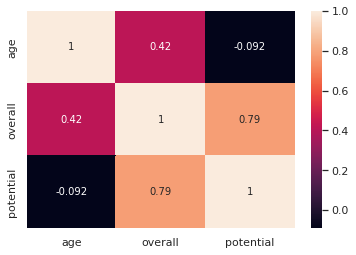

In [ ]:
sns.heatmap(df1[['age','overall','potential']].corr(),annot=True)

In [ ]:
X = df1[['overall']]
Y = df1['potential']
print(X.shape)
print(Y.shape)

(7880, 1)
(7880,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=9)
print(X_train.shape)
print(X_test.shape)

(6304, 1)
(1576, 1)


In [ ]:
# Initialization
lin_reg_mod = LinearRegression()
# Training
lin_reg_mod.fit(X_train, y_train)
# Prediction
y_pred = lin_reg_mod.predict(X_test)

In [ ]:
lin_reg_mod.coef_

array([0.7072859])

In [ ]:
lin_reg_mod.intercept_

28.94349991362661

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



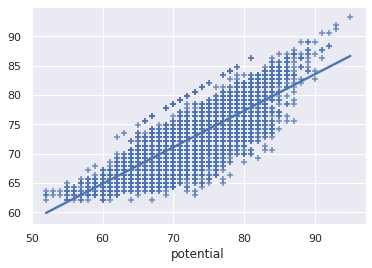

In [ ]:
predictions = lin_reg_mod.predict(X_train)
sns.regplot(y_train,predictions, marker="+")

In [ ]:
test_set_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

test_set_r2 = r2_score(y_test, y_pred)

print(test_set_rmse)
print(test_set_r2)

3.790005874478329
0.5968301706461105


In [ ]:
a1=dfst[sto].nlargest(1, 'new_overall')
a2=dfrw[rwo].nlargest(1, 'new_overall')
a3=dflw[lwo].nlargest(1, 'new_overall')
a4=dfcm[cmo].nlargest(3, 'new_overall')
a5=dflb[lbo].nlargest(1, 'new_overall')
a6=dfrb[rbo].nlargest(1, 'new_overall')
a7=dfcb[cbo].nlargest(2, 'new_overall')
a8=dfgk[gko].nlargest(1, 'new_overall')
frames = [a1, a2, a3, a4, a5, a6, a7, a8]
result = pd.concat(frames)
result

,short_name,player_position,age,overall,new_overall
6,K. Mbappé,ST,22,91,84.90
195,F. Chiesa,RW,23,83,80.20
94,M. Rashford,LW,23,85,81.80
488,Renato Sanches,CM,23,80,79.00
196,F. Valverde,CM,22,83,78.80
373,C. Nkunku,CM,23,81,77.00
137,T. Hernández,LB,23,84,81.70
95,A. Hakimi,RB,22,85,81.80
279,Éder Militão,CB,23,82,78.50
96,M. de Ligt,CB,21,85,77.90


In [ ]:
result['Potential'] = df1.potential
result['New_Potential'] = (result.new_overall*lin_reg_mod.coef_+lin_reg_mod.intercept_).round(2)
result

,short_name,player_position,age,overall,new_overall,Potential,New_Potential
6,K. Mbappé,ST,22,91,84.90,95,88.99
195,F. Chiesa,RW,23,83,80.20,91,85.67
94,M. Rashford,LW,23,85,81.80,89,86.80
488,Renato Sanches,CM,23,80,79.00,86,84.82
196,F. Valverde,CM,22,83,78.80,89,84.68
373,C. Nkunku,CM,23,81,77.00,86,83.40
137,T. Hernández,LB,23,84,81.70,90,86.73
95,A. Hakimi,RB,22,85,81.80,88,86.80
279,Éder Militão,CB,23,82,78.50,89,84.47
96,M. de Ligt,CB,21,85,77.90,90,84.04


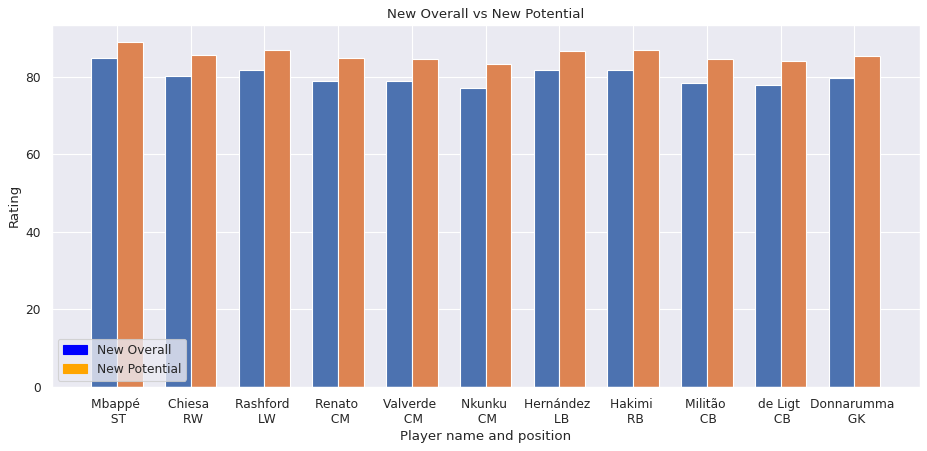

In [ ]:
from matplotlib.pyplot import figure


figure(figsize=(14, 6), dpi=80)


labels = ['Mbappé \n ST','Chiesa \n RW','Rashford \n LW','Renato \n CM','Valverde \n CM','Nkunku \n CM','Hernández \n LB','Hakimi \n RB','Militão \n CB','de Ligt \n CB','Donnarumma \n GK']
overall = result.new_overall
potential = result.New_Potential

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

bar1 = np.arange(len(x))
bar2 = [i+width for i in bar1]
bar3 = bar1 + bar2

plt.bar(bar1, overall, width, label='New Overall')
plt.bar(bar2, potential, width, label='New Potential')
plt.title("New Overall vs New Potential")
plt.ylabel("Rating")
plt.xlabel("Player name and position")
plt.xticks(bar1+width/2,labels)

colors = {'New Overall':'blue', 'New Potential':'orange'}
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels, loc=3)

# Create labels
##label = ['91', '95', '83', '91', '85', '89', '80', '86', '83', '89', '81', '86','84', '90', '85', '88', '82', '89', '85', '90', '89', '93']
 # Text on the top of each bar
##for i in range(len(bar3)):
##    plt.text(x = bar3[i]-0.01 , y = bar3[i]+0.001, s = label[i], size = 15)
plt.show()

In [ ]:
b1=dfstfifa[stof].nlargest(1, 'overall')
b2=dfrwfifa[rwof].nlargest(1, 'overall')
b3=dflwfifa[lwof].nlargest(1, 'overall')
b4=dfcmfifa[cmof].nlargest(3, 'overall')
b5=dflbfifa[lbof].nlargest(1, 'overall')
b6=dfrbfifa[rbof].nlargest(1, 'overall')
b7=dfcbfifa[cbof].nlargest(2, 'overall')
b8=dfgkfifa[gkof].nlargest(1, 'overall')
frames2 = [b1, b2, b3, b4, b5, b6, b7, b8]
result2 = pd.concat(frames2)
result2

,short_name,player_position,age,overall
6,K. Mbappé,ST,22,91
45,J. Sancho,RW,21,87
94,M. Rashford,LW,23,85
138,K. Havertz,CM,22,84
139,P. Foden,CM,21,84
193,M. Mount,CM,22,83
137,T. Hernández,LB,23,84
44,T. Alexander-Arnold,RB,22,87
96,M. de Ligt,CB,21,85
197,J. Koundé,CB,22,83


In [ ]:
result2['Potential'] = df1.potential
result2

,short_name,player_position,age,overall,Potential
6,K. Mbappé,ST,22,91,95
45,J. Sancho,RW,21,87,91
94,M. Rashford,LW,23,85,89
138,K. Havertz,CM,22,84,92
139,P. Foden,CM,21,84,92
193,M. Mount,CM,22,83,89
137,T. Hernández,LB,23,84,90
44,T. Alexander-Arnold,RB,22,87,92
96,M. de Ligt,CB,21,85,90
197,J. Koundé,CB,22,83,89


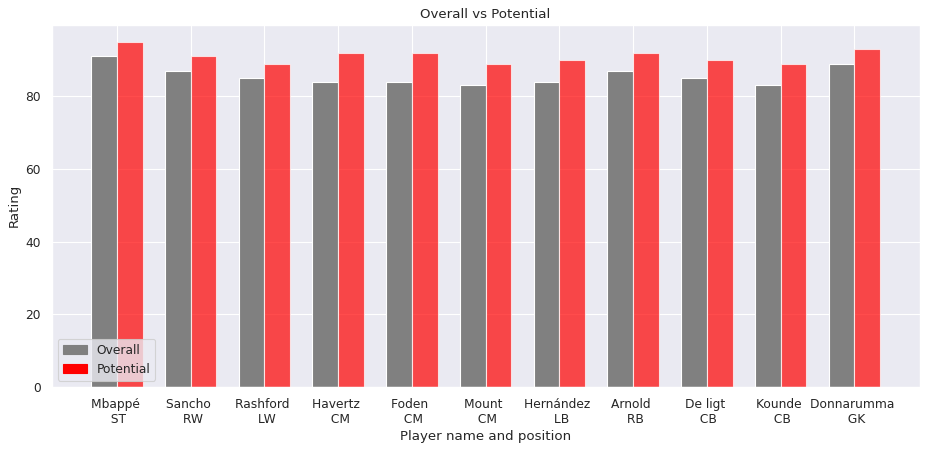

In [ ]:
from matplotlib.pyplot import figure


figure(figsize=(14, 6), dpi=80)


labels = ['Mbappé \n ST','Sancho \n RW','Rashford \n LW','Havertz \n CM','Foden \n CM','Mount \n CM','Hernández \n LB','Arnold \n RB','De ligt \n CB','Kounde \n CB','Donnarumma \n GK']
overall = result2.overall
potential = result2.Potential

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

bar1 = np.arange(len(x))
bar2 = [i+width for i in bar1]
bar3 = bar1 + bar2

plt.bar(bar1, overall, width, label='Overall',color = 'gray')
plt.bar(bar2, potential, width, label='Potential', color = 'red', alpha = 0.7)
plt.title("Overall vs Potential")
plt.ylabel("Rating")
plt.xlabel("Player name and position")
plt.xticks(bar1+width/2,labels)

colors = {'Overall':'gray', 'Potential':'red'}
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels, loc=3)

plt.show()

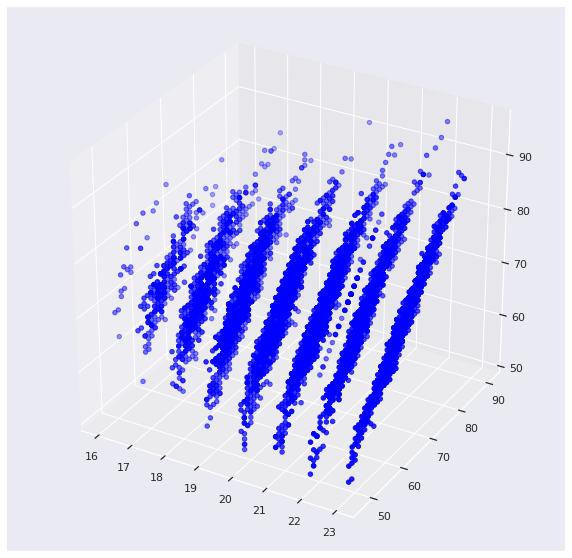

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(df1['age'], df1['overall'], df1['potential'], c='blue')
plt.show()
